In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as ply
data = pd.read_csv('./Appliances-energy-prediction-data-master/energydata_complete.csv')
#Renaming Variables for better understanding
data.rename(columns={'T1':'Kitchen_Temp','RH_1':'Kitchen_Hum','T2':'LivingRoom_Temp','RH_2':'LivingRoom_Hum',
                   'T3':'LaundryRoom_Temp','RH_3':'LaundryRoom_Hum','T4':'OfficeRoom_Temp','RH_4':'OfficeRoom_Hum',
                   'T5':'BathRoom_Temp','RH_5':'BathRoom_Hum','T6':'OutsideNorth_Temp','RH_6':'OutsideNorth_Hum',
                   'T7':'IroningRoom_Temp','RH_7':'IroningRoom_Hum','T8':'TeenagerRoom_Temp','RH_8':'TeenagerRoom_Hum',
                   'T9':'ParentRoom_Temp','RH_9':'ParentRoom_Hum','T_out':'Outside_Temp','Press_mm_hg':'Pressure',
                   'RH_out':'Humidity'},inplace=True)
data.head(5)

,date,Appliances,lights,Kitchen_Temp,Kitchen_Hum,LivingRoom_Temp,LivingRoom_Hum,LaundryRoom_Temp,LaundryRoom_Hum,OfficeRoom_Temp,...,ParentRoom_Temp,ParentRoom_Hum,Outside_Temp,Pressure,Humidity,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


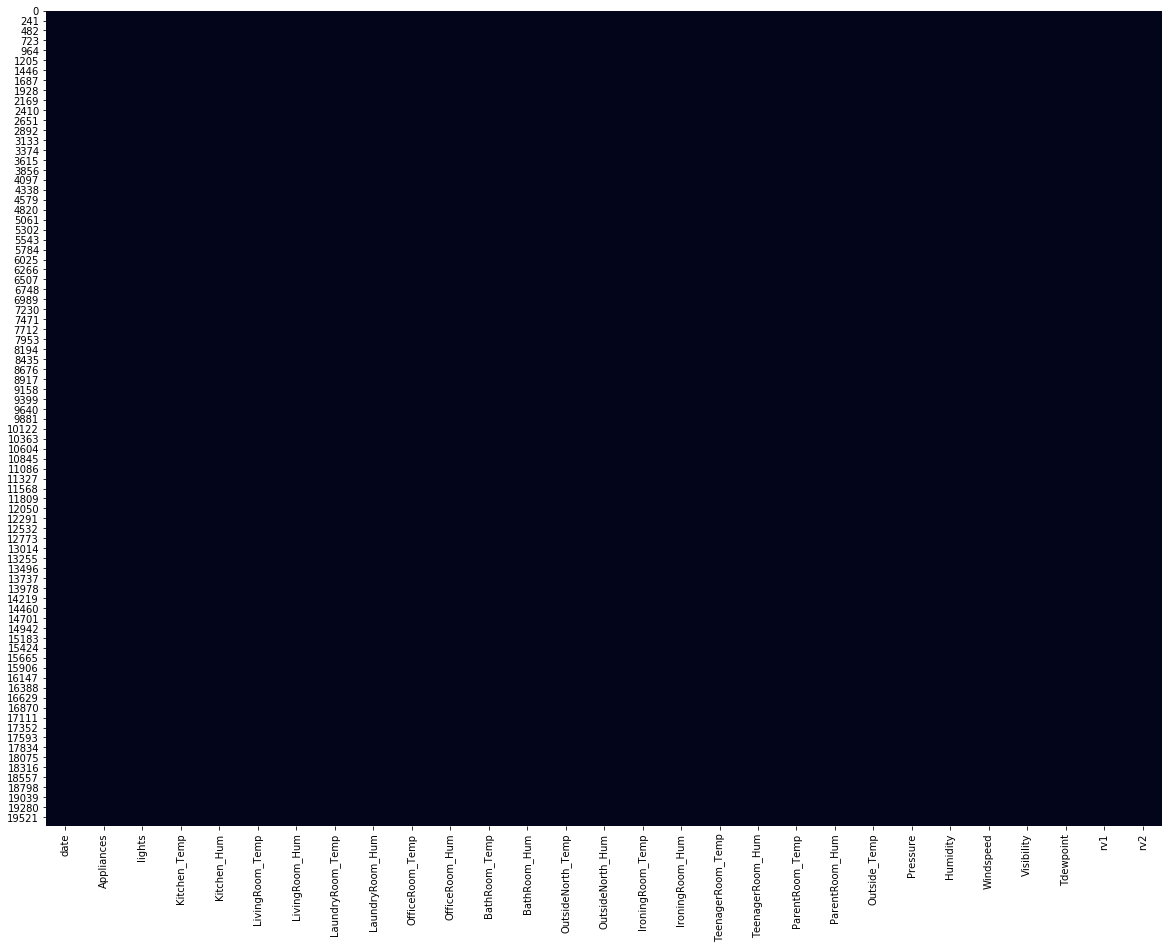

In [7]:
#Checking for any null values within the Dataset
plt.subplots(figsize=(20,15))
sns.heatmap(data.isnull(), cbar = False)

In [8]:
data['Energy_consumed'] = data['Appliances'] + data['lights']

In [9]:
data = data[['date','Appliances', 'lights', 'Energy_consumed', 'Kitchen_Temp', 'Kitchen_Hum',
       'LivingRoom_Temp', 'LivingRoom_Hum', 'LaundryRoom_Temp',
       'LaundryRoom_Hum', 'OfficeRoom_Temp', 'OfficeRoom_Hum', 'BathRoom_Temp',
       'BathRoom_Hum', 'OutsideNorth_Temp', 'OutsideNorth_Hum',
       'IroningRoom_Temp', 'IroningRoom_Hum', 'TeenagerRoom_Temp',
       'TeenagerRoom_Hum', 'ParentRoom_Temp', 'ParentRoom_Hum', 'Outside_Temp',
       'Pressure', 'Humidity', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'rv2'
       ]]
data

,date,Appliances,lights,Energy_consumed,Kitchen_Temp,Kitchen_Hum,LivingRoom_Temp,LivingRoom_Hum,LaundryRoom_Temp,LaundryRoom_Hum,...,ParentRoom_Temp,ParentRoom_Hum,Outside_Temp,Pressure,Humidity,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,90,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,...,17.033333,45.530000,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,90,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,...,17.066667,45.560000,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,80,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,...,17.000000,45.500000,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,90,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,...,17.000000,45.400000,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,100,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,...,17.000000,45.400000,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
5,2016-01-11 17:50:00,50,40,90,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,...,17.000000,45.290000,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484
6,2016-01-11 18:00:00,60,50,110,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,...,17.000000,45.290000,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763
7,2016-01-11 18:10:00,60,50,110,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,...,17.000000,45.290000,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890
8,2016-01-11 18:20:00,60,40,100,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,...,17.000000,45.290000,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702
9,2016-01-11 18:30:00,70,40,110,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,...,17.000000,45.290000,5.950000,734.300000,91.500000,5.500000,40.000000,4.650000,3.089314,3.089314


count    19735.000000
mean       101.496833
std        104.380829
min         10.000000
25%         50.000000
50%         60.000000
75%        100.000000
max       1110.000000
Name: Energy_consumed, dtype: float64


C:\Users\rishi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



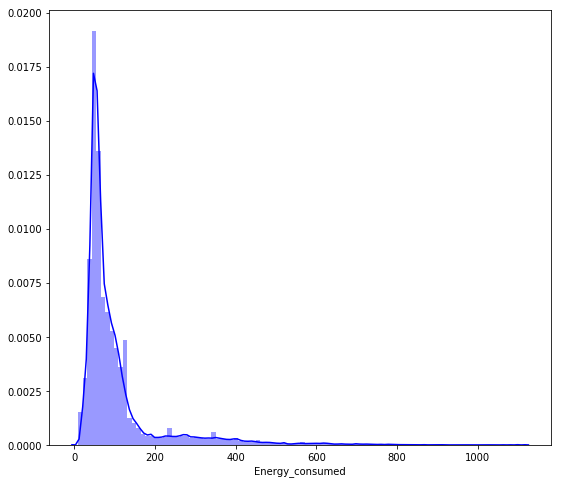

In [12]:
print(data['Energy_consumed'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(data['Energy_consumed'], color='b', bins=100)